In [3]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("pima-indians-diabetes.csv", header=None)
df

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       768 non-null    int64  
 1   1       768 non-null    int64  
 2   2       768 non-null    int64  
 3   3       768 non-null    int64  
 4   4       768 non-null    int64  
 5   5       768 non-null    float64
 6   6       768 non-null    float64
 7   7       768 non-null    int64  
 8   8       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<AxesSubplot:>

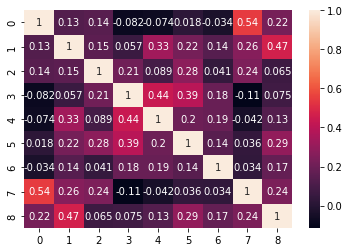

In [6]:
sns.heatmap(df.corr(), annot=True)

## Model

In [7]:
x = df.iloc[:, :-1].to_numpy()
y = df.iloc[:, -1].to_numpy()

In [10]:
def ML_training(X, y):
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

      nb = GaussianNB()
      nb.fit(X_train, y_train)
      nb_pred = nb.predict(X_test)

      log_lm = LogisticRegression(max_iter=1000)
      log_lm.fit(X_train, y_train)
      logy_pred = log_lm.predict(X_test)

      knn = KNeighborsClassifier()
      knn.fit(X_train, y_train)
      knn_pred = knn.predict(X_test)

      print("Naive Bayes Report in test set")
      print(classification_report(y_test, nb_pred))
      print('Naive Bayes accuracy:', accuracy_score(y_test, nb_pred) * 100)
      plt.figure()
      sns.heatmap(confusion_matrix(y_test, nb_pred), annot=True)

      print("------------------------------------------------------")

      print("Logistic Regression Report in test set")
      print(classification_report(y_test, logy_pred))
      print('Logistic Regression accuracy:',
            accuracy_score(y_test, logy_pred) * 100)
      plt.figure()
      sns.heatmap(confusion_matrix(y_test,logy_pred), annot=True)

      print("------------------------------------------------------")
      print("K Neighbors in test set")
      print(classification_report(y_test, knn_pred))
      print('KNN accuracy:',
            accuracy_score(y_test, knn_pred) * 100)
      plt.figure()
      sns.heatmap(confusion_matrix(y_test, knn_pred), annot=True)

      print("------------------------------------------------------")

Naive Bayes Report in test set
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       107
           1       0.67      0.62      0.64        47

    accuracy                           0.79       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.79      0.79      0.79       154

Naive Bayes accuracy: 79.22077922077922
------------------------------------------------------
Logistic Regression Report in test set
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.62      0.68        47

    accuracy                           0.82       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.82      0.82      0.82       154

Logistic Regression accuracy: 82.46753246753246
------------------------------------------------------
K Neighbors in test set
              precision    recall  f1-score   support


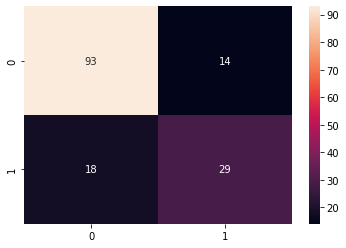

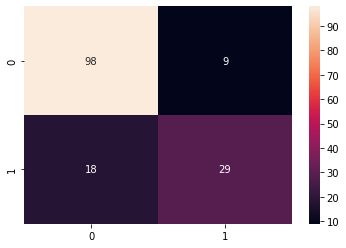

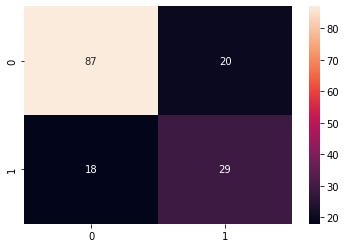

In [11]:
ML_training(x, y)